<a href="https://colab.research.google.com/github/haikalrsyn/all-kind-of-stuff/blob/main/%5B2_class%5D_Tugas_2_Praktikum_TPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Class
## Tugas 2 Praktikum Teknik Pembelajaran Mesin

## Artificial Neural Network (ANN)

# Library

In [1]:
!pip install pandas
!pip install keras

import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Penyiapan Data

In [2]:
file_path = "/content/Pakistan house price dataset.csv"
df = pd.read_csv(file_path, delimiter=";")
df.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02/04/2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05/04/2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04/05/2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,04/05/2019,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,01/04/2019,NaN,NaN,Kanal,1.0,1-5 Kanal
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05/05/2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10/19/2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,6/27/2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal


Berdasarkan hasil dataframe awal, diketahui bahwa variabel dalam dataset terdiri dari dua tipe, yaitu numerik dan kategorik. Terdapat 12 variabel kategorik dan 8 variabel numerik. Namun, beberapa variabel, seperti `page_url`, `location_id`, `property_id`, dan lainnya dianggap kurang relevan untuk dimasukkan ke dalam model. Oleh karena itu, diperlukan proses seleksi variabel guna menentukan variabel yang paling sesuai untuk digunakan dalam pemodelan.

In [3]:
df["harga"] = df["price"].apply(lambda x:
                                "Murah" if x <= 17767764 else
                                "Mahal")
df_H = df.drop(columns=["property_id", "location_id", "page_url", "date_added",
                        "location", "latitude", "longitude", "area", "agency",
                        "agent", "Area Category", "price"])
df_H.head()

,property_type,city,province_name,baths,purpose,bedrooms,Area Type,Area Size,harga
0,Flat,Islamabad,Islamabad Capital,2,For Sale,2,Marla,4.0,Murah
1,Flat,Islamabad,Islamabad Capital,3,For Sale,3,Marla,5.6,Murah
2,House,Islamabad,Islamabad Capital,6,For Sale,5,Marla,8.0,Murah
3,House,Islamabad,Islamabad Capital,4,For Sale,4,Kanal,2.0,Mahal
4,House,Islamabad,Islamabad Capital,3,For Sale,3,Marla,8.0,Murah


In [4]:
df_H["Area.M2"] = np.where(df_H["Area Type"] == "Marla", df_H["Area Size"] * 25.2929,
                  np.where(df_H["Area Type"] == "Kanal", df_H["Area Size"] * 505.857, np.nan))

df_H = df_H.drop(columns=["Area Type", "Area Size"])

df_H.head()


,property_type,city,province_name,baths,purpose,bedrooms,harga,Area.M2
0,Flat,Islamabad,Islamabad Capital,2,For Sale,2,Murah,101.17160
1,Flat,Islamabad,Islamabad Capital,3,For Sale,3,Murah,141.64024
2,House,Islamabad,Islamabad Capital,6,For Sale,5,Murah,202.34320
3,House,Islamabad,Islamabad Capital,4,For Sale,4,Mahal,1011.71400
4,House,Islamabad,Islamabad Capital,3,For Sale,3,Murah,202.34320


In [5]:
print(df_H.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   city           168446 non-null  object 
 2   province_name  168446 non-null  object 
 3   baths          168446 non-null  int64  
 4   purpose        168446 non-null  object 
 5   bedrooms       168446 non-null  int64  
 6   harga          168446 non-null  object 
 7   Area.M2        168446 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.3+ MB
None


Sebelum dilakukan pemodelan, perlu ditentukan variabel yang akan digunakan dalam model. Untuk pemodelan klasifikasi, diperlukan variabel respons dalam bentuk kategorik. Oleh karena itu, jika variabel respons yang digunakan adalah `price`, maka perlu dilakukan transformasi tipe data karena variabel `price` memiliki bentuk numerik.

Transformasi ini dilakukan dengan menentukan nilai rata-rata atau median harga sebagai titik tengah (cutoff). Dalam hal ini, nilai rata-rata yang digunakan adalah 17.767.764, kategori harga diklasifikasikan menjadi dua, yaitu:
- **Murah**, jika harga kurang dari atau sama dengan 17.767.764
- **Mahal**, jika harga lebih dari 17.767.764

Selanjutnya, dilakukan pemilihan variabel yang akan dimasukkan ke dalam model. Variabel yang digunakan sebagai variabel penjelas meliputi:
- `property_type`
- `city`
- `province_name`
- `bath`
- `purpose`
- `bedroom`
- `Area_Type`

Sedangkan variabel `harga` yang telah dikategorikan akan digunakan sebagai variabel respons.

Selain itu pada variabel `Area_Type` satuan Marla dan Kanal dikonversi menjadi meter persegi agar memudahkan dalam interpretasi dan juga pemodelan. Sehingga yang sebelumnya merupakan variabel kategorik menjadi variabel numerik baru dengan nama `Area.M2`

In [6]:
print(df_H.describe())

               baths       bedrooms        Area.M2
count  168446.000000  168446.000000  168446.000000
mean        2.874227       3.179422     302.123707
std         2.463400       1.971401    2285.974027
min         0.000000       0.000000       0.000000
25%         0.000000       2.000000     121.405920
50%         3.000000       3.000000     179.579590
75%         4.000000       4.000000     303.514800
max       403.000000      68.000000  404685.600000


Statistik deskriptif menunjukkan bahwa jumlah kamar mandi (`baths`) dan kamar tidur (`bedrooms`) memiliki distribusi yang relatif sempit, dengan nilai rata-rata masing-masing sekitar 2,874 dan 3,179, serta standar deviasi sekitar 2,46 dan 1,97. Nilai minimum untuk kedua variabel ini adalah 0, menunjukkan adanya properti tanpa kamar mandi atau kamar tidur. Sementara itu, luas area (`Area.M2`) memiliki rata-rata sekitar 302,124 dengan variasi yang sangat besar (standar deviasi 2285.974) dibandingkan variabel lainnya. Nilai maksimumnya mencapai 404685,6, yang mencerminkan keberagaman ukuran properti dalam dataset.

In [7]:
df_H.isnull().sum()

,0
property_type,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
harga,0
Area.M2,0


Seperti yang telah dijelaskan sebelumnya tidak terdapat *missing value* pada data. Oleh karena itu tidak dilakukan penanganan *missing value*

# Data Exploration

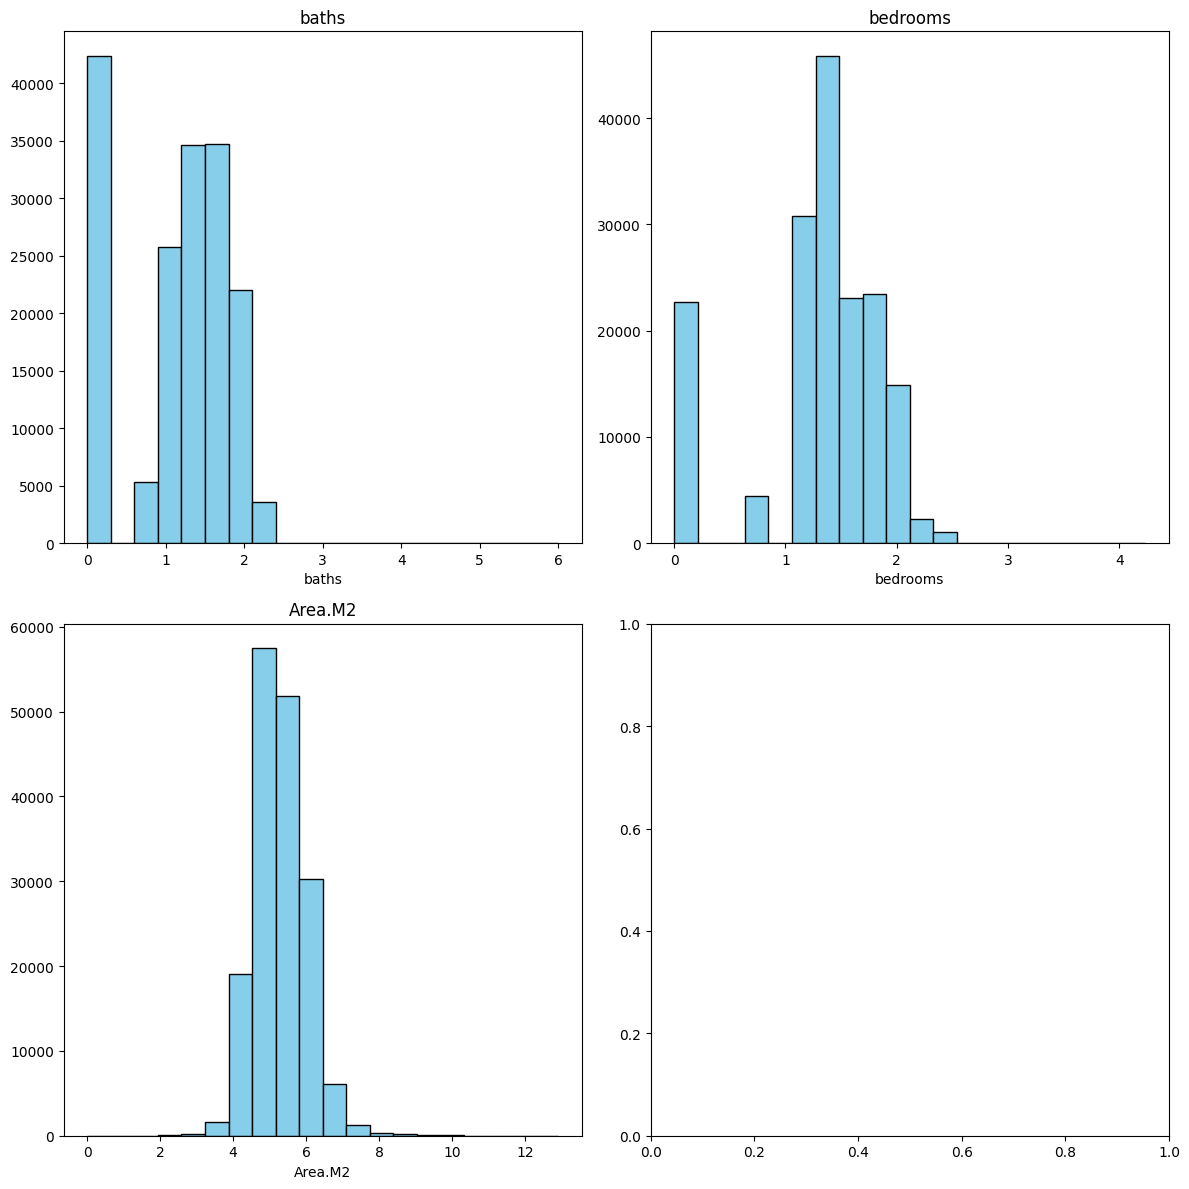

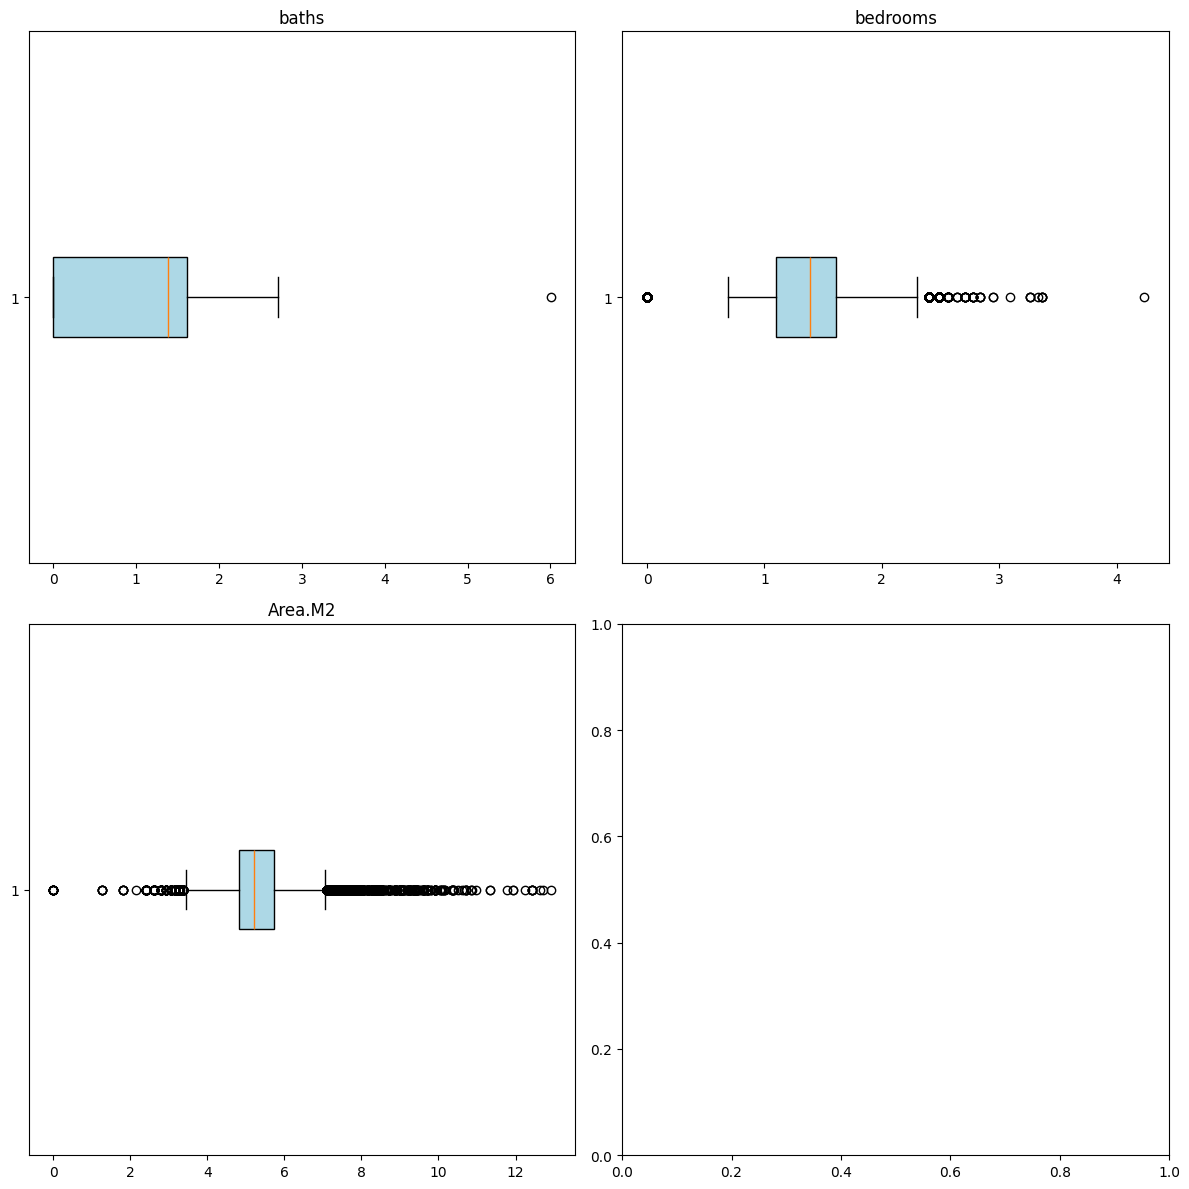

In [10]:
num_cols = df_H.select_dtypes(include=["number"])

num_features = len(num_cols.columns)
rows = int(np.ceil(num_features / 2))

# Histogram untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Berdasarkan hasil eksplorasi terhadap variabel yang berbentuk numerik menggunakan histogram dan boxplot menghasilkan visualisasi yang sulit dilihat dikarenakan memiliki distribusi yang condong ke kanan dengan sangat banyak pencilan. Oleh karena itu seluruh peubah numerik di transformasi ke dalam bentuk logaritma natural agar mengurangi kemiringan (skewness) pada distribusi sehingga sebaran mendekati sebaran normal

In [9]:
numerical_cols = df_H.select_dtypes(include=[np.number]).columns

# Mengubah semua kolom numerik menjadi log natural
df_H[numerical_cols] = df_H[numerical_cols].apply(lambda x: np.log(x + 1))
print(df_H.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   city           168446 non-null  object 
 2   province_name  168446 non-null  object 
 3   baths          168446 non-null  float64
 4   purpose        168446 non-null  object 
 5   bedrooms       168446 non-null  float64
 6   harga          168446 non-null  object 
 7   Area.M2        168446 non-null  float64
dtypes: float64(3), object(5)
memory usage: 10.3+ MB
None


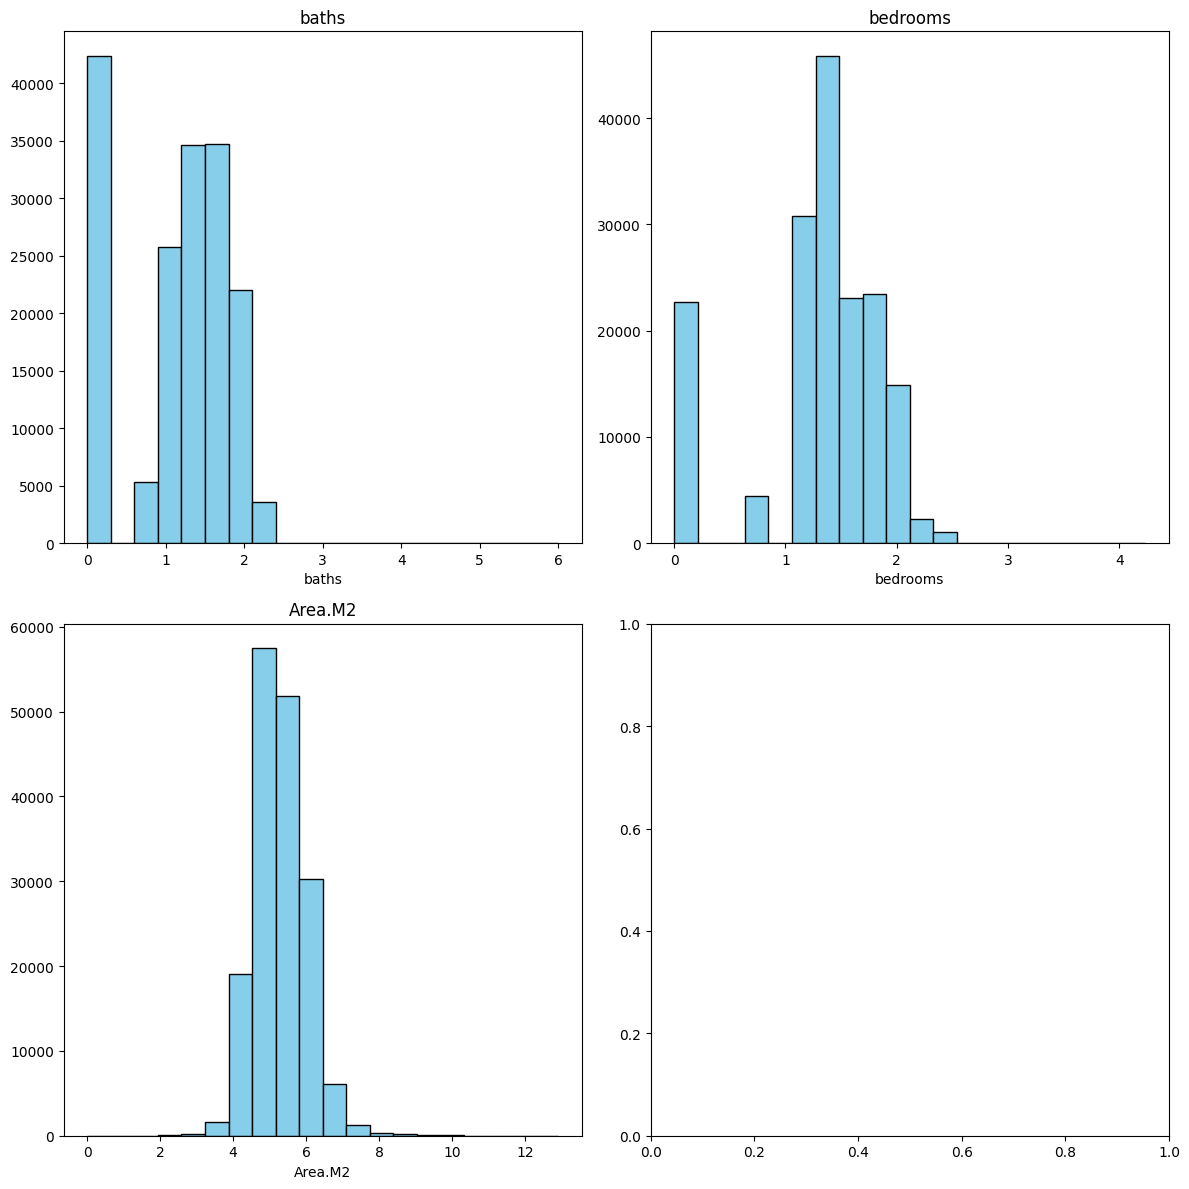

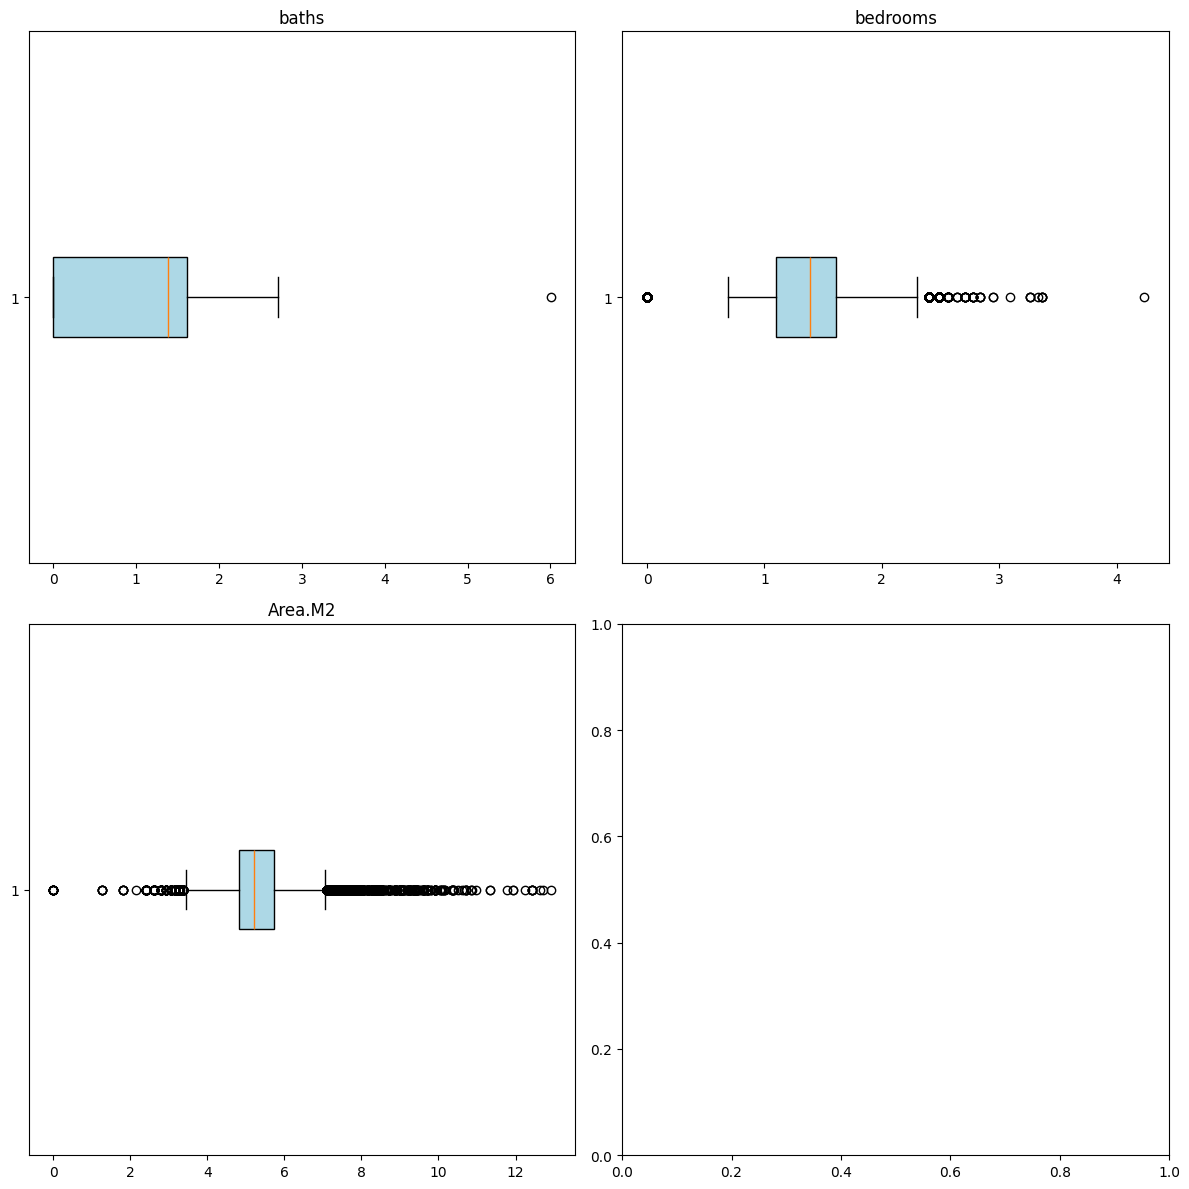

In [11]:
num_cols = df_H.select_dtypes(include=["number"])

num_features = len(num_cols.columns)
rows = int(np.ceil(num_features / 2))

# Histogram untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Setelah dilakukan transformasi ke dalam bentuk logaritmik, visualisasi menjadi lebih jelas.  Mayoritas properti memiliki 1 kamar mandi dan 1 kamar tidur. Untuk luas area (Area.M2), sebagian besar properti memiliki ukuran kecil hingga sedang, dengan sedikit properti yang memiliki luas jauh lebih besar.

Sementara itu dapat terlihat di dalam boxplot juga masih banyak indikasi outlier dalam dataset. Namun, dalam kasus ini, pencilan tersebut tidak dilakukan penanganan lebih lanjut.

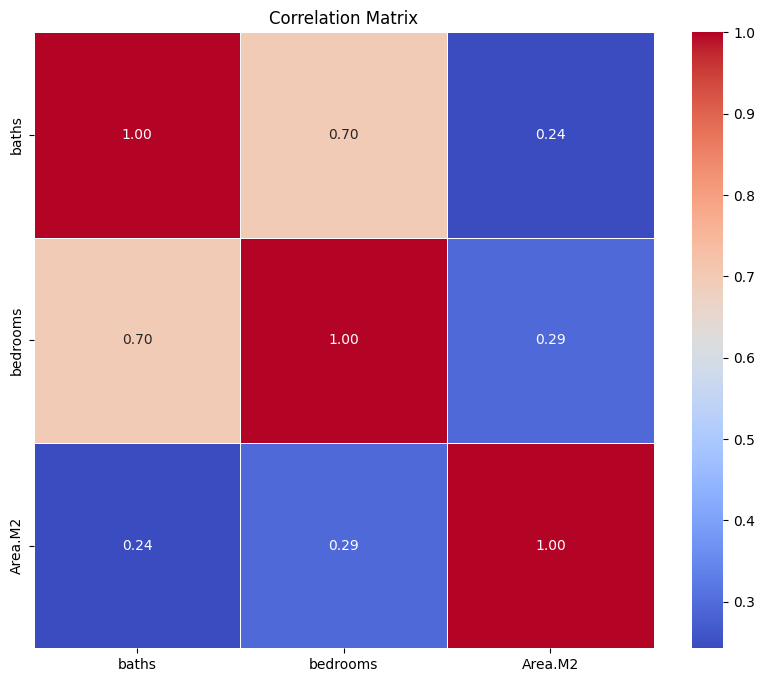

In [12]:
num_cols = df_H.select_dtypes(include=[np.number]).columns
correlation_matrix = df_H[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

Berdasarkan matriks korelasi yang ditampilkan, terdapat beberapa hubungan yang cukup signifikan antara variabel-variabel dalam dataset:  

**Hubungan Positif Kuat:**  
Variabel `baths` memiliki korelasi tinggi dengan `bedrooms` (0.70), menunjukkan bahwa properti dengan lebih banyak kamar tidur cenderung juga memiliki lebih banyak kamar mandi.  

**Hubungan Positif Lemah:**  
Variabel `baths` dan `Area.M2` memiliki korelasi sebesar 0.24, sedangkan `bedrooms` dengan `Area.M2` memiliki korelasi 0.29. Ini menunjukkan bahwa luas properti memiliki hubungan yang relatif lemah dengan jumlah kamar mandi dan kamar tidur, sehingga ada kemungkinan properti dengan luas yang lebih besar tidak selalu memiliki lebih banyak kamar atau kamar mandi.  

Secara keseluruhan, hubungan yang paling kuat dalam dataset ini adalah antara jumlah kamar tidur dan jumlah kamar mandi, sementara luas area memiliki korelasi yang lebih rendah dengan kedua variabel lainnya.

In [13]:
df_H.head(5)

,property_type,city,province_name,baths,purpose,bedrooms,harga,Area.M2
0,Flat,Islamabad,Islamabad Capital,1.098612,For Sale,1.098612,Murah,4.626654
1,Flat,Islamabad,Islamabad Capital,1.386294,For Sale,1.386294,Murah,4.960326
2,House,Islamabad,Islamabad Capital,1.945910,For Sale,1.791759,Murah,5.314895
3,House,Islamabad,Islamabad Capital,1.609438,For Sale,1.609438,Mahal,6.920389
4,House,Islamabad,Islamabad Capital,1.386294,For Sale,1.386294,Murah,5.314895


property_type: 7 unique values
city: 5 unique values
province_name: 3 unique values
purpose: 2 unique values
harga: 2 unique values


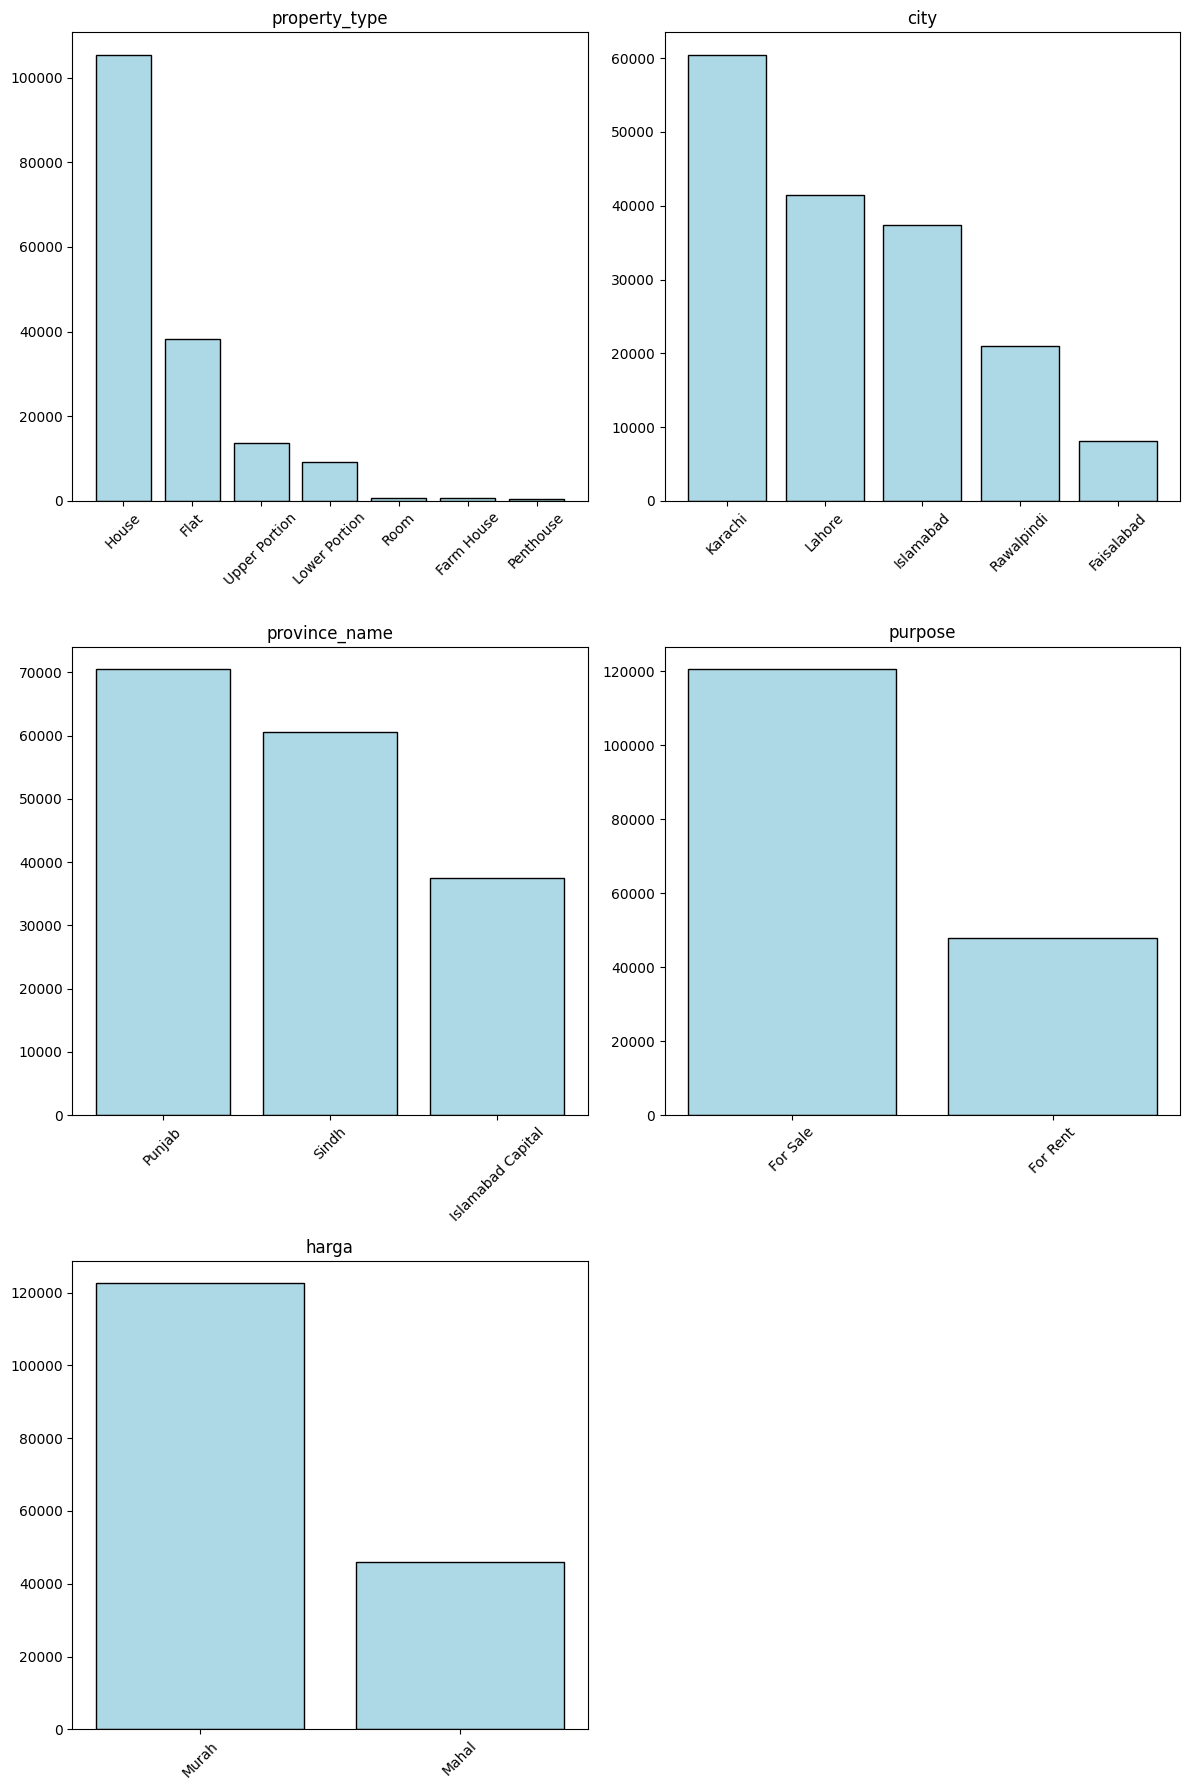

In [14]:
for col in df_H.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df_H[col].nunique()} unique values")
for col in ["property_type", "city", "province_name", "purpose", "harga"]:
    df_H[col] = df_H[col].astype("category")

cat_cols = df_H.select_dtypes(include=["category"])
num_cats = len(cat_cols.columns)

if num_cats > 0:
    rows = int(np.ceil(num_cats / 2))

    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols.columns):
        counts = cat_cols[col].value_counts()
        axes[i].bar(counts.index, counts.values, color="lightblue", edgecolor="black")
        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom kategorikal dalam dataset.")

Hasil eksplorasi terhadap variabel kategorik menggunakan diagram batang menunjukkan bahwa tipe rumah yang paling umum adalah rumah yang dijual, dengan jumlah tertinggi berada di Kota Karachi, Provinsi Punjab dengan tujuan utama penjualan adalah for sale. Selain itu, mayoritas harga rumah termasuk dalam kategori sangat murah, karena berada di bawah rata-rata harga penjualan secara keseluruhan.

Ketidakseimbangan jumlah data dalam variabel harga antara kategori murah dan mahal dapat disebabkan oleh adanya nilai ekstrem dalam data, yang menyebabkan rata-rata harga rumah menjadi lebih tinggi.

# Data Preprocessing

## Splitting Data

In [15]:
from sklearn.model_selection import train_test_split

random_state = 234
df_train, df_test = train_test_split(df_H, test_size=0.3, stratify=df_H["harga"], random_state=random_state)
harga_test = df_test["harga"]

Dataset telah melalui proses pra-pemrosesan yang mengonversi variabel kategori ke tipe data category, yang dapat mempercepat komputasi dalam model machine learning. Selanjutnya, untuk digunakan dalam pemodelan berbasis numerik, variabel kategori mungkin perlu dikodekan lebih lanjut menggunakan teknik seperti label encoding atau one-hot encoding.

In [16]:
df_train.isnull().sum()

,0
property_type,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
harga,0
Area.M2,0


In [17]:
df_test.isnull().sum()

,0
property_type,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
harga,0
Area.M2,0


## *Features Scaling*

In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Memisahkan fitur (X) dan target (y)
train_X = df_train.drop(columns=["harga"])  # Menghapus kolom target dari X
test_X = df_test.drop(columns=["harga"])
train_y = df_train["harga"]  # Mengambil target y
test_y = df_test["harga"]

# One-hot encoding untuk fitur kategorikal
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)
train_X, test_X = train_X.align(test_X, join="left", axis=1, fill_value=0)
train_X = train_X.values
test_X = test_X.values

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Label Encoding untuk target y
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)


num_classes = len(le.classes_)
train_y = to_categorical(train_y, num_classes=num_classes)
test_y = to_categorical(test_y, num_classes=num_classes)

print("Shape train_X:", train_X.shape)
print("Shape test_X:", test_X.shape)
print("Shape train_y:", train_y.shape)
print("Shape test_y:", test_y.shape)


Shape train_X: (117912, 20)
Shape test_X: (50534, 20)
Shape train_y: (117912, 2)
Shape test_y: (50534, 2)


- `train_X.shape = (117912, 20)` → Data training memiliki **117.912 sampel** dan **20 fitur** setelah one-hot encoding.  
- `test_X.shape = (50534, 20)` → Data testing memiliki **50.534 sampel** dengan jumlah fitur yang sama.  
- `train_y.shape = (117912, 4)` dan `test_y.shape = (50534, 4)` menunjukkan bahwa target kini memiliki empat kolom, sesuai hasil one-hot encoding.  

Dataset telah berhasil dikonversi ke bentuk numerik dengan preprocessing yang lengkap, mencakup one-hot encoding untuk fitur kategori, normalisasi untuk fitur numerik, serta encoding target untuk memastikan model dapat memahami dan memprosesnya dengan baik.

## ADASYN

Berdasarkan hasil eksplorasi data, ditemukan adanya ketidakseimbangan pada variabel target, di mana jumlah observasi dengan kelas "sangat murah" jauh lebih banyak dibandingkan dengan kelas "sangat mahal". Ketidakseimbangan ini dapat menyebabkan model cenderung lebih berpihak pada kelas mayoritas, sehingga mengurangi kemampuan model dalam mengenali pola dari kelas minoritas.  

Untuk mengatasi permasalahan ini, diperlukan teknik penyeimbangan data, salah satunya adalah *Adaptive Synthetic Sampling* (ADASYN). Metode ini bekerja dengan membuat sampel sintetis untuk kelas minoritas secara adaptif, dengan lebih banyak sampel dihasilkan pada area dengan kepadatan data yang lebih rendah. Pendekatan ini membantu model belajar lebih baik terhadap pola kelas minoritas yang sulit dibedakan, sehingga meningkatkan keseimbangan data dan akurasi prediksi secara keseluruhan.

Kelebihan ADASYN dibandingkan SMOTE adalah ADASYN menghasilkan lebih banyak sampel sintetis di daerah dengan kepadatan data rendah, sehingga lebih fokus pada area yang lebih sulit dibedakan oleh model. Hal ini membuat ADASYN lebih efektif dalam menangani kelas minoritas dengan distribusi yang tidak merata, sementara SMOTE menghasilkan sampel secara merata di seluruh ruang fitur.

In [19]:
from imblearn.over_sampling import ADASYN
from collections import Counter
import numpy as np

train_y_labels = np.argmax(train_y, axis=1)

print("Distribusi sebelum ADASYN:", Counter(train_y_labels))
adasyn = ADASYN(sampling_strategy="auto", random_state=42)

# Melakukan oversampling pada data latih
train_X_resampled, train_y_resampled = adasyn.fit_resample(train_X, train_y_labels)
print("Distribusi sesudah ADASYN:", Counter(train_y_resampled))

# konversi kembali ke one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = train_y.shape[1]  # Mengambil jumlah kelas dari one-hot sebelumnya
train_y_resampled = to_categorical(train_y_resampled, num_classes=num_classes)

print("Shape train_X_resampled:", train_X_resampled.shape)
print("Shape train_y_resampled:", train_y_resampled.shape)



Distribusi sebelum ADASYN: Counter({1: 85814, 0: 32098})
Distribusi sesudah ADASYN: Counter({0: 87576, 1: 85814})
Shape train_X_resampled: (173390, 20)
Shape train_y_resampled: (173390, 2)


Berdasarkan hasil penerapan ADASYN, distribusi data target berhasil diseimbangkan, sehingga jumlah amatan pada kedua kelas kini hampir setara, yaitu sebanyak 87.576 amatan untuk kelas murah dan 85.814 amatan untuk kelas mahal. Dengan demikian, permasalahan *class imbalance* yang sebelumnya ada dalam dataset telah teratasi, yang diharapkan dapat meningkatkan kinerja model dalam melakukan prediksi, terutama dalam mengklasifikasikan kelas minoritas.

# Pemodelan dengan 1 *Hidden Layer*

In [20]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_X_resampled.shape[1],)),
    Dense(train_y_resampled.shape[1], activation='softmax')
])

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,890 (23.01 KB)

 Trainable params: 5,890 (23.01 KB)

 Non-trainable params: 0 (0.00 B)

Hasil pemodelan Artificial Neural Network (ANN) menunjukkan bahwa model terdiri dari 2 layer, dengan rincian sebagai berikut:

1. **Dense Layer 1 (Hidden Layer)**:
   - Memiliki 256 neuron dengan jumlah parameter sebanyak 5.376.
   - Jumlah parameter dihitung sebagai:  
     (jumlah fitur input × jumlah neuron) + bias = (jumlah fitur input × 256) + 256 = 5.376.

2. **Dense Layer 2 (Output Layer)**:
   - Memiliki 4 neuron, sesuai dengan jumlah kelas pada variabel target.
   - Menggunakan 514 parameter, dihitung sebagai:  
     (256 × 2) + 2 = 514.

**Kesimpulan**:
- Total parameter dalam model adalah 5.890, yang seluruhnya dapat di-train (trainable).
- Model ini relatif sederhana dengan 1 hidden layer dan output layer yang memiliki 2 neuron, yang sesuai untuk masalah klasifikasi multi-kelas.

Epoch 1/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7951 - loss: 0.4035 - val_accuracy: 0.7094 - val_loss: 0.5706
Epoch 2/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8661 - loss: 0.2921 - val_accuracy: 0.6264 - val_loss: 0.7283
Epoch 3/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8669 - loss: 0.2879 - val_accuracy: 0.8424 - val_loss: 0.4391
Epoch 4/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8674 - loss: 0.2885 - val_accuracy: 0.7748 - val_loss: 0.5599
Epoch 5/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8671 - loss: 0.2857 - val_accuracy: 0.5927 - val_loss: 0.8459
Epoch 6/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8683 - loss: 0.2849 - val_accuracy: 0.8192 - val_loss: 0.4789
Epoch 7/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8706 - loss: 0.2819 - val_accuracy: 0.7097 - val_loss: 0.6249
Epoch 8/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8715 - l

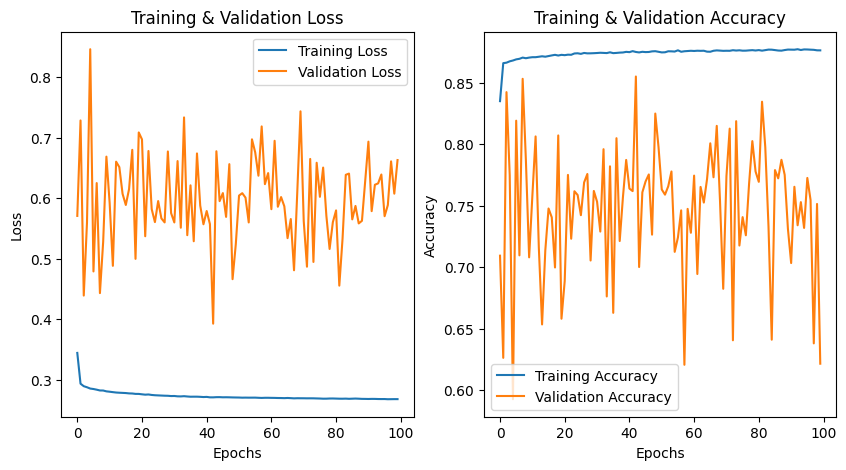

In [21]:
history = model.fit(
    train_X_resampled, train_y_resampled,
    shuffle=True,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

Hasil visualisasi menunjukkan tren loss dan akurasi untuk data training serta validasi selama 100 epoch.  

1. **Training & Validation Loss**:  
   - Loss pada data training cenderung stabil dengan sedikit penurunan.  
   - Loss pada data validasi menunjukkan fluktuasi yang cukup tinggi, yang dapat mengindikasikan ketidakstabilan dalam proses generalisasi model.  

2. **Training & Validation Accuracy**:  
   - Akurasi training relatif stabil di sekitar 87%.  
   - Akurasi validasi mengalami fluktuasi yang signifikan, dengan peningkatan dan penurunan drastis, yang bisa mengindikasikan adanya overfitting atau model yang kurang stabil.  

**Kesimpulan**:  
- Fluktuasi yang besar pada loss dan akurasi validasi dapat menunjukkan bahwa model kurang stabil dan mungkin memerlukan perbaikan, seperti pengurangan learning rate, penambahan regulasi (dropout atau L2 regularization), atau peningkatan jumlah data pelatihan.  
- Performa training yang cukup stabil namun validasi yang tidak konsisten dapat menjadi indikasi bahwa model terlalu fit terhadap data training dan kurang mampu melakukan generalisasi dengan baik.

In [22]:
scores = model.evaluate(test_X, test_y)

# Menampilkan hasil evaluasi (loss dan accuracy)
print(f"Test Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")

1580/1580 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9035 - loss: 0.2116
Test Loss: 0.2107
Test Accuracy: 0.9038


Model menunjukkan performa yang baik dengan **test loss sebesar 0.2107** dan **test accuracy 90.38%**, yang mengindikasikan prediksi yang akurat dengan tingkat kesalahan rendah. Akurasi yang tinggi menunjukkan model mampu mengenali pola dalam data uji dengan baik.

# Pemodelan dengan 2 *Hidden Layer* dan *Dropout*

In [23]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_X_resampled.shape[1],)),  # Hidden Layer 1
    Dropout(0.2),
    Dense(128, activation='relu'),  # Hidden Layer 2
    Dropout(0.2),
    Dense(train_y.shape[1], activation='softmax')  # Output Layer
])

# Mengkompilasi model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,530 (150.51 KB)

 Trainable params: 38,530 (150.51 KB)

 Non-trainable params: 0 (0.00 B)

Model yang digunakan memiliki tiga layer, terdiri dari dua hidden layer dan satu output layer, dengan jumlah parameter total sebesar 38.530. Rinciannya adalah sebagai berikut:

1. **Dense Layer 1 (Hidden Layer 1)**:
   - Memiliki 256 neuron dengan jumlah parameter sebanyak 5.376.
   - Diikuti oleh **Dropout Layer**, yang bertujuan untuk mengurangi risiko overfitting.

2. **Dense Layer 2 (Hidden Layer 2)**:
   - Memiliki 128 neuron dengan jumlah parameter sebanyak 32.896.
   - Diikuti oleh **Dropout Layer** lagi untuk mencegah overfitting lebih lanjut.

3. **Dense Layer 3 (Output Layer)**:
   - Memiliki 2 neuron, sesuai dengan jumlah kelas pada variabel target.
   - Menggunakan 258 parameter.

**Kesimpulan**:
- Total parameter dalam model adalah 38.530, yang seluruhnya dapat di-train (trainable).
- Model ini lebih kompleks dibandingkan model sebelumnya dengan dua hidden layer dan penggunaan Dropout untuk mengurangi risiko overfitting. Struktur ini berpotensi meningkatkan kemampuan generalisasi, namun perlu evaluasi lebih lanjut untuk memastikan tidak terjadi overfitting atau underfitting.

In [24]:
# Melatih model
history = model.fit(
    train_X_resampled, train_y_resampled,
    shuffle=True,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
)

# Menampilkan ringkasan model
model.summary()

Epoch 1/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8023 - loss: 0.3877 - val_accuracy: 0.7542 - val_loss: 0.5489
Epoch 2/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8606 - loss: 0.3009 - val_accuracy: 0.6828 - val_loss: 0.6970
Epoch 3/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8623 - loss: 0.2965 - val_accuracy: 0.7837 - val_loss: 0.5459
Epoch 4/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8643 - loss: 0.2943 - val_accuracy: 0.6891 - val_loss: 0.6664
Epoch 5/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8652 - loss: 0.2915 - val_accuracy: 0.8406 - val_loss: 0.4636
Epoch 6/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8657 - loss: 0.2901 - val_accuracy: 0.7541 - val_loss: 0.5969
Epoch 7/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8681 - loss: 0.2874 - val_accuracy: 0.8048 - val_loss: 0.5143
Epoch 8/100
4335/4335 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8691 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,592 (451.54 KB)

 Trainable params: 38,530 (150.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,062 (301.03 KB)

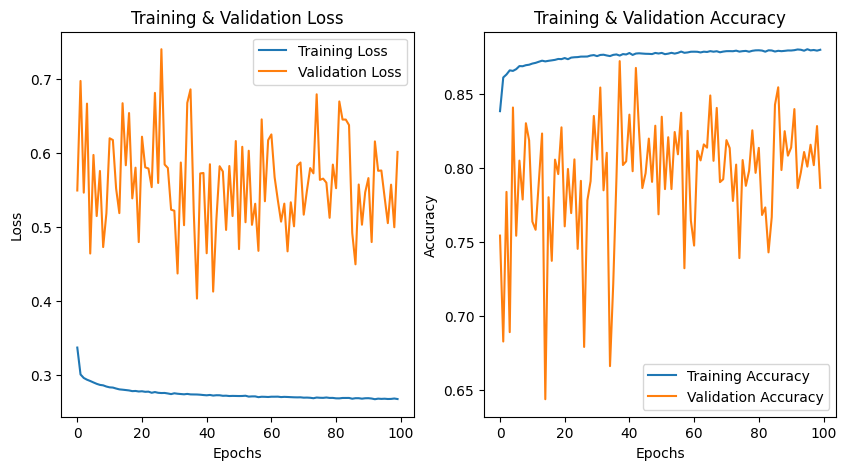

In [25]:
# Menampilkan plot pembelajaran model pada setiap epoch
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

Grafik menunjukkan bahwa **training loss dan validation loss mengalami penurunan yang stabil**, menandakan model berhasil belajar dengan baik tanpa indikasi overfitting yang signifikan. Pada grafik akurasi, **training accuracy dan validation accuracy meningkat secara bertahap**, dengan validation accuracy yang sedikit fluktuatif tetapi tetap mendekati training accuracy. Hal ini menunjukkan bahwa model mampu melakukan generalisasi dengan baik terhadap data baru.

In [49]:
# Mengevaluasi model menggunakan data uji
scores = model.evaluate(test_X, test_y, verbose=0)  # verbose=0 untuk menyembunyikan output evaluasi

# Menampilkan hasil evaluasi (loss dan accuracy)
print(f"Test Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")

Test Loss: 0.2198
Test Accuracy: 0.8957


Hasil evaluasi menunjukkan bahwa model memiliki **test loss sebesar 0.2198** dan **test accuracy sebesar 89.57%**, yang menandakan bahwa model masih kurang mampu dalam melakukan prediksi. Nilai loss yang cukup tinggi juga mengindikasikan bahwa kesalahan prediksi relatif besar. Namun nilai akurasi yang lebih rendah daripada model dengan 1 *hidden layer* menunjukkan bahwa model dengan i *hidden layer* lebih mampu menggeneralisasi data uji.

# Pemodelan dengan *Tuning Optimizer*

In [26]:
# Parameter model
input_dim = train_X_resampled.shape[1]  # Jumlah fitur input
output_dim = train_y_resampled.shape[1] # Jumlah kelas output

# Daftar optimizer yang akan diuji
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum_SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01)
}

# Fungsi untuk membuat model dengan optimizer tertentu
def create_model(optimizer):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_dim,)),  # Hidden Layer 1
        Dense(output_dim, activation="softmax")  # Output Layer
    ])

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    model.summary()  # Menampilkan arsitektur model

    return model

# Fungsi untuk melatih model dan menyimpan histori loss & akurasi
def train_and_evaluate(optimizer_name, optimizer):
    model = create_model(optimizer)

    history = model.fit(
        train_X_resampled, train_y_resampled,
        shuffle=True,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Simpan hasil training
    results = pd.DataFrame({
        "optimizer": [optimizer_name] * 100,
        "epoch": list(range(1, 101)),
        "loss": history.history["val_loss"],
        "accuracy": history.history["val_accuracy"]
    })

    return {"model": model, "results": results}


Syntax diatas bertujuan untuk membandingkan performa empat optimizer berbeda, yaitu SGD, Momentum SGD, Adam, dan RMSprop, dalam melatih model ANN. Model terdiri dari satu hidden layer dengan 64 neuron beraktivasi ReLU dan output layer dengan aktivasi softmax untuk klasifikasi multikelas. Setiap model dikompilasi menggunakan categorical crossentropy sebagai fungsi loss dan dilatih selama 100 epoch dengan batch size 32 serta validasi sebesar 20% dari data latih. Hasil pelatihan berupa nilai loss dan akurasi validasi dicatat untuk setiap epoch guna mengevaluasi kinerja masing-masing optimizer.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,474 (5.76 KB)

 Trainable params: 1,474 (5.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,474 (5.76 KB)

 Trainable params: 1,474 (5.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,474 (5.76 KB)

 Trainable params: 1,474 (5.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,474 (5.76 KB)

 Trainable params: 1,474 (5.76 KB)

 Non-trainable params: 0 (0.00 B)

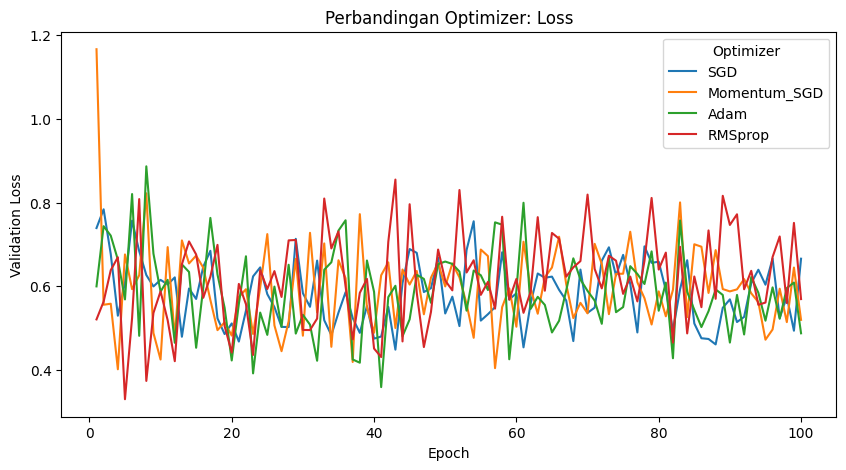

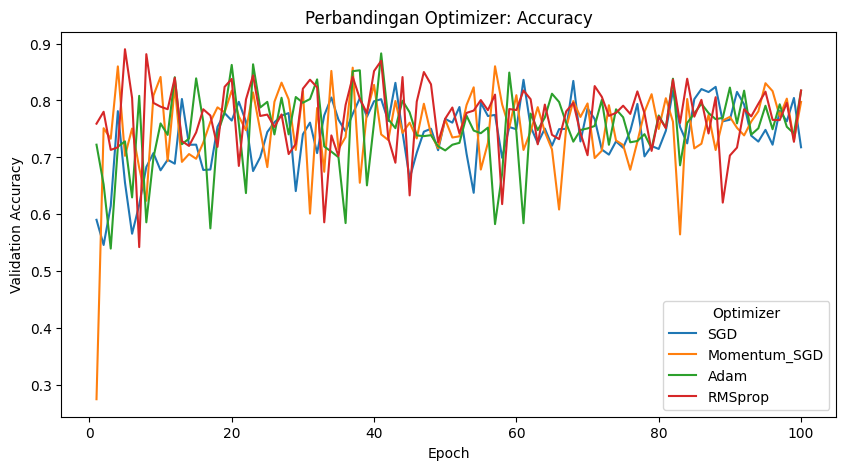

In [27]:
# Jalankan training untuk setiap optimizer
models_results = [train_and_evaluate(name, optimizers[name]) for name in optimizers]

# Menggabungkan hasil training dari semua optimizer
results = pd.concat([res["results"] for res in models_results], ignore_index=True)

# Menyimpan model yang telah dilatih
models = {name: res["model"] for name, res in zip(optimizers.keys(), models_results)}

# Plot perbandingan loss antar optimizer
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="epoch", y="loss", hue="optimizer")
plt.title("Perbandingan Optimizer: Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(title="Optimizer")
plt.show()

# Plot perbandingan akurasi antar optimizer
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="epoch", y="accuracy", hue="optimizer")
plt.title("Perbandingan Optimizer: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend(title="Optimizer")
plt.show()

Grafik pertama menunjukkan perbandingan loss pada data validasi untuk berbagai optimizer. Secara eksplorasi sulit menentukan optimizer mana yang memiliki akurasi lebih tinggi karena terlihat bentuknya yang cukup abstrak mirip.

In [28]:
# Mengevaluasi setiap model dengan data uji dan menyimpan hasilnya
evaluation_results = {}

for name, model in models.items():
    scores = model.evaluate(test_X, test_y, verbose=0)  # Evaluasi model
    evaluation_results[name] = {"Test Loss": scores[0], "Test Accuracy": scores[1]}

# Menampilkan hasil evaluasi untuk setiap optimizer
for name, result in evaluation_results.items():
    print(f"Optimizer: {name}")
    print(f"Test Loss: {result['Test Loss']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("-" * 30)

Optimizer: SGD
Test Loss: 0.2199
Test Accuracy: 0.8995
------------------------------
Optimizer: Momentum_SGD
Test Loss: 0.2402
Test Accuracy: 0.8863
------------------------------
Optimizer: Adam
Test Loss: 0.2474
Test Accuracy: 0.8804
------------------------------
Optimizer: RMSprop
Test Loss: 0.2485
Test Accuracy: 0.8810
------------------------------


Berdasarkan hasil evaluasi pada data uji, optimizer SGD menunjukkan performa terbaik dengan test loss terendah (0.2199) dan test accuracy tertinggi (0.8995). Optimizer Momentum SGD memiliki performa yang mendekati Adam, namun dengan loss yang sedikit lebih tinggi (0.2402). Sementara itu, Adam dan RMSprop memiliki loss yang lebih besar dan akurasi yang lebih rendah, menunjukkan bahwa mereka kurang efektif dalam mengoptimalkan model dibandingkan SGD. Oleh karena itu, **SGD merupakan pilihan terbaik untuk model ini** karena memberikan keseimbangan yang optimal antara minimisasi loss dan peningkatan akurasi.

# Pemodelan dengan *Tuning Learning Rate*

In [29]:
# Daftar learning rate yang akan diuji
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Fungsi untuk membuat model dengan learning rate tertentu
def create_model(learning_rate):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),  # Hidden Layer
        Dense(output_dim, activation="softmax")  # Output Layer
    ])

    optimizer = SGD(learning_rate=learning_rate)

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    return model

# Fungsi untuk melatih model dan menyimpan hasil
def train_and_evaluate(lr_name, learning_rate):
    model = create_model(learning_rate)

    history = model.fit(
        train_X_resampled, train_y_resampled,
        shuffle=True,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Simpan hasil training dan validasi dalam DataFrame
    results = pd.DataFrame({
        "learning_rate": [lr_name] * 100,
        "epoch": list(range(1, 101)),
        "train_loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "train_accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"]
    })

    return {"model": model, "history": results}


Syntax diatas bertujuan untuk mengevaluasi pengaruh berbagai learning rate terhadap performa model neural network menggunakan optimizer SGD. Model yang digunakan memiliki satu hidden layer dengan 256 neuron dan output layer dengan aktivasi softmax. Fungsi `create_model` membangun model dengan learning rate tertentu, sedangkan `train_and_evaluate` melatih model selama 100 epoch dengan batch size 32 dan validation split 20%. Hasil pelatihan, termasuk loss dan akurasi pada data training serta validasi, disimpan dalam DataFrame untuk analisis lebih lanjut.

In [30]:
# Menyimpan hasil training dan model untuk setiap learning rate
results_list = {}
models = {}

for lr in learning_rates:
    lr_name = f"lr_{lr}"
    train_result = train_and_evaluate(lr_name, lr)

    models[lr_name] = train_result["model"]  # Simpan model
    results_list[lr_name] = train_result["history"]  # Simpan hasil training

# Gabungkan semua hasil training ke dalam satu dataframe
results = pd.concat(results_list.values(), ignore_index=True)
results

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,learning_rate,epoch,train_loss,val_loss,train_accuracy,val_accuracy
0,lr_0.0001,1,0.690447,0.722189,0.533378,0.404550
1,lr_0.0001,2,0.642186,0.788907,0.635093,0.002566
2,lr_0.0001,3,0.618236,0.806327,0.618692,0.000000
3,lr_0.0001,4,0.601145,0.804875,0.618649,0.000000
4,lr_0.0001,5,0.587516,0.797501,0.627177,0.260771
...,...,...,...,...,...,...
395,lr_0.1,96,0.272649,0.573168,0.875584,0.769220
396,lr_0.1,97,0.272656,0.623742,0.874546,0.743901
397,lr_0.1,98,0.273100,0.504389,0.874950,0.810139
398,lr_0.1,99,0.272892,0.665236,0.875786,0.637234


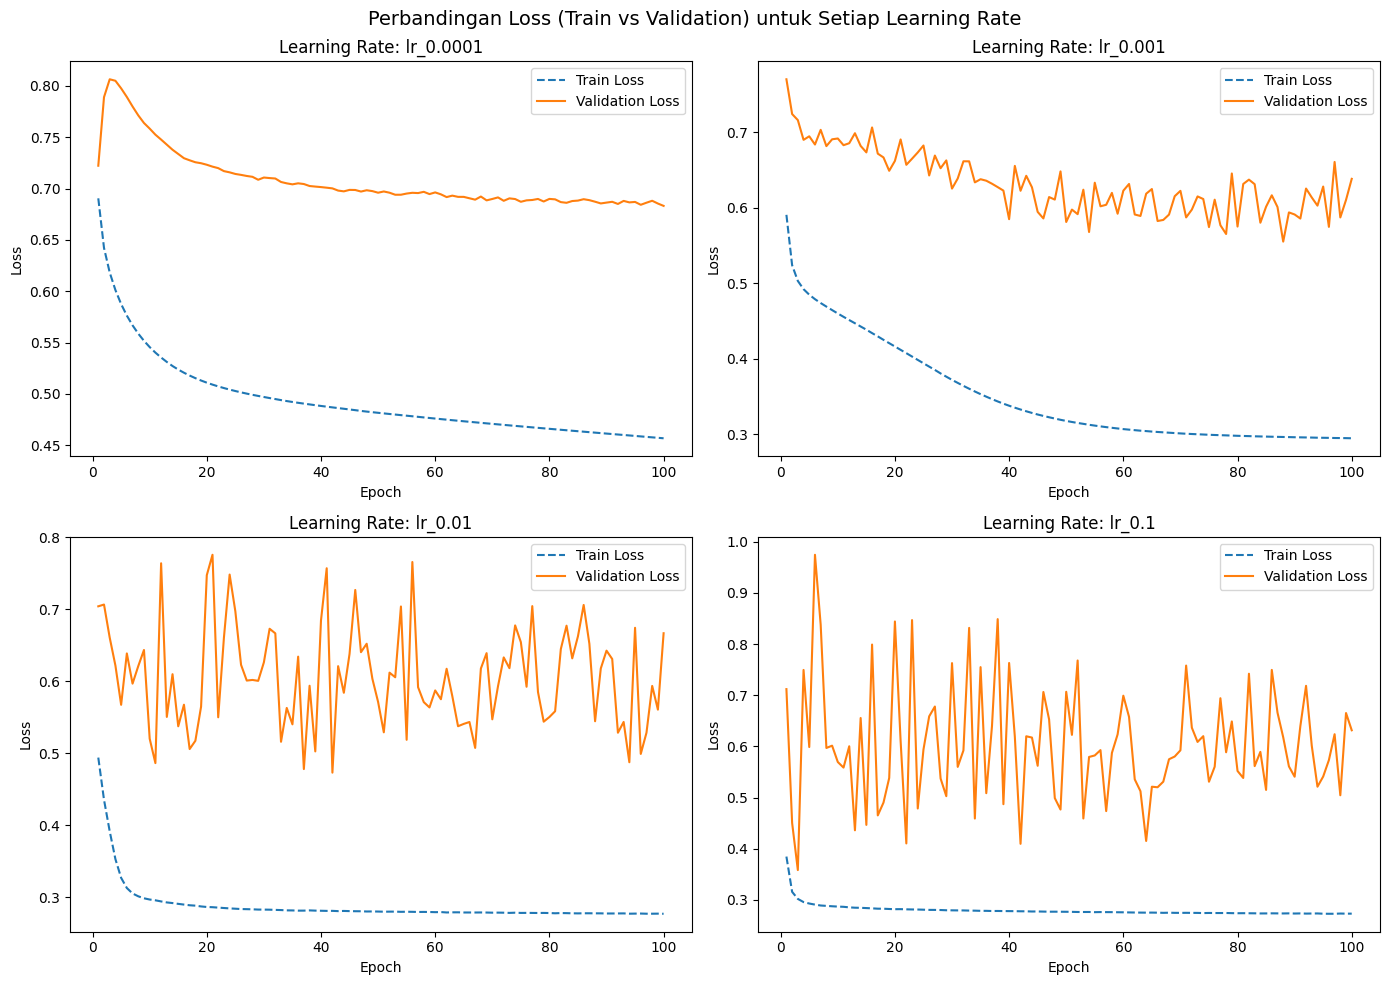

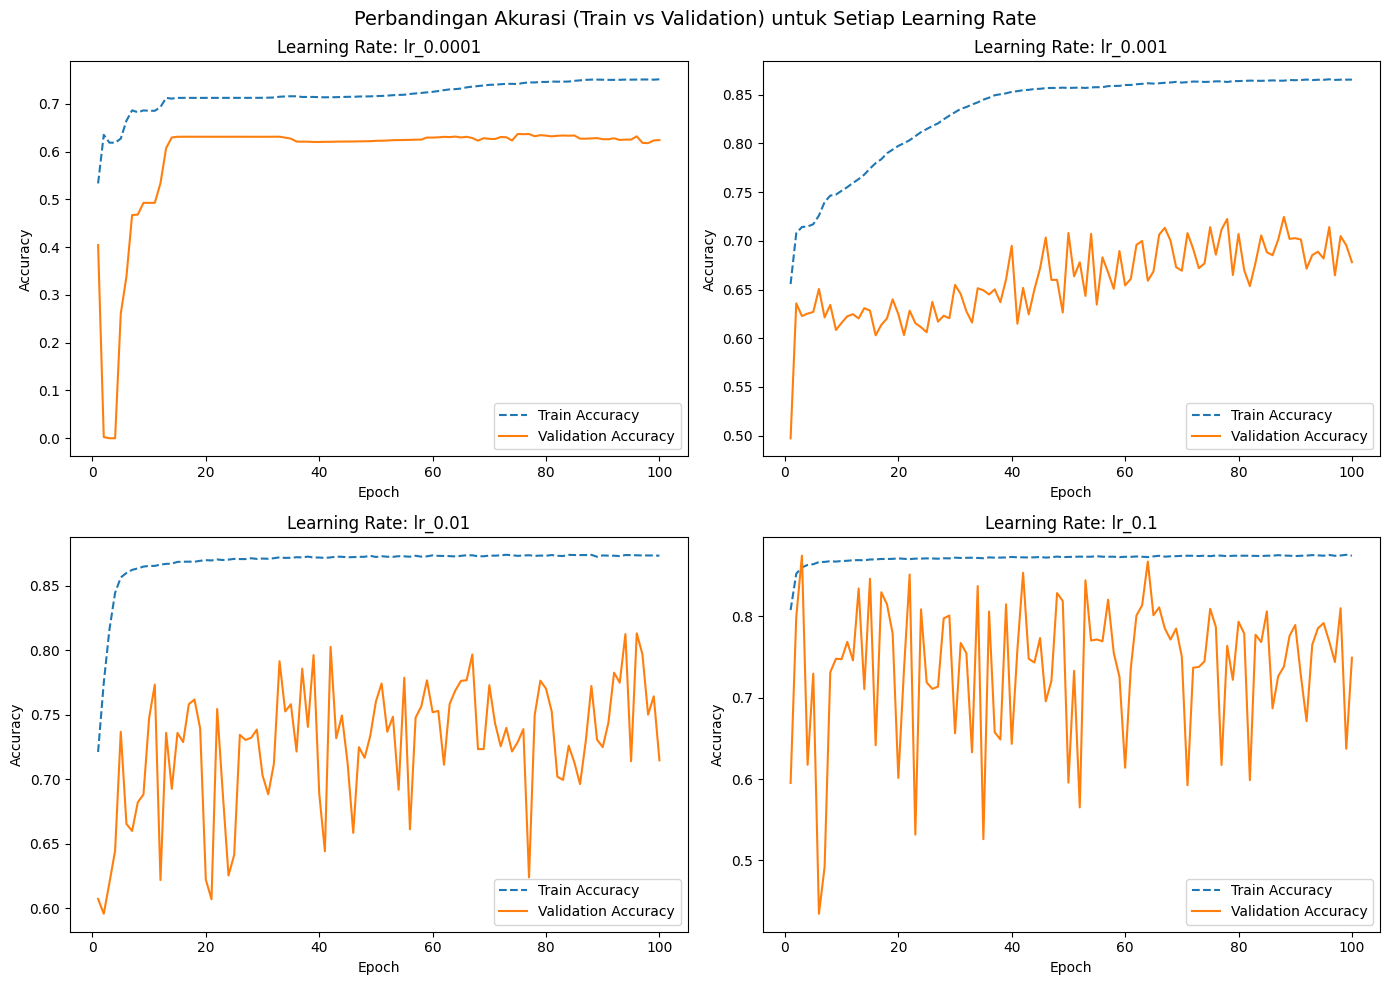

In [33]:
# Dapatkan daftar unique learning rate
unique_lrs = results["learning_rate"].unique()

# Buat subplot dengan 2 baris, 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten agar lebih mudah diakses dengan loop

# Loop untuk membuat grafik Loss per learning rate
for i, lr in enumerate(unique_lrs):
    subset = results[results["learning_rate"] == lr]

    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="train_loss", label="Train Loss", linestyle="dashed")
    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="val_loss", label="Validation Loss")

    axes[i].set_title(f"Learning Rate: {lr}")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()

plt.suptitle("Perbandingan Loss (Train vs Validation) untuk Setiap Learning Rate", fontsize=14)
plt.tight_layout()
plt.show()

# Buat subplot dengan 2 baris, 2 kolom untuk Accuracy
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop untuk membuat grafik Accuracy per learning rate
for i, lr in enumerate(unique_lrs):
    subset = results[results["learning_rate"] == lr]

    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="train_accuracy", label="Train Accuracy", linestyle="dashed")
    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="val_accuracy", label="Validation Accuracy")

    axes[i].set_title(f"Learning Rate: {lr}")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Accuracy")
    axes[i].legend()

plt.suptitle("Perbandingan Akurasi (Train vs Validation) untuk Setiap Learning Rate", fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
# Evaluasi setiap model pada data uji
for lr_name, model in models.items():
    scores = model.evaluate(test_X, test_y, verbose=0)  # Evaluasi model
    print(f"{lr_name}:")
    print(f"  - Test Loss: {scores[0]:.4f}")
    print(f"  - Test Accuracy: {scores[1]:.4f}")
    print("-" * 40)

lr_0.0001:
  - Test Loss: 0.4195
  - Test Accuracy: 0.7696
----------------------------------------
lr_0.001:
  - Test Loss: 0.2418
  - Test Accuracy: 0.8973
----------------------------------------
lr_0.01:
  - Test Loss: 0.2218
  - Test Accuracy: 0.8986
----------------------------------------
lr_0.1:
  - Test Loss: 0.2198
  - Test Accuracy: 0.8957
----------------------------------------


Hasil pengujian menunjukkan bahwa **learning rate 0.01 memberikan performa terbaik** dengan test loss terendah (0.2218) dan test accuracy tertinggi (0.8986), menandakan bahwa model mampu melakukan generalisasi dengan baik. Learning rate yang terlalu kecil (0.0001) menghasilkan akurasi yang kuran baik dan nilai loss yang lebih tinggi, menunjukkan bahwa konvergensi lebih lambat. Sementara itu, learning rate yang terlalu besar (0.01 dan 0.1) menyebabkan performa menurun, kemungkinan karena optimasi menjadi tidak stabil atau melewatkan titik optimal.

## Prediksi

In [35]:
# Melakukan prediksi pada data uji
prediksi = models["lr_0.01"].predict(test_X)
print(prediksi[:5])  # Menampilkan 5 prediksi pertama

1580/1580 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[1.0412368e-01 8.9587623e-01]
 [5.7530641e-03 9.9424702e-01]
 [5.1253605e-01 4.8746395e-01]
 [3.3711217e-04 9.9966288e-01]
 [2.5798390e-02 9.7420156e-01]]


Hasil prediksi menunjukkan probabilitas keluaran untuk empat kelas pada lima sampel pertama dari data uji. Setiap baris merepresentasikan probabilitas model terhadap masing-masing kelas, dengan jumlah total mendekati 1.  

Misalnya:  
- **Sampel pertama** memiliki probabilitas tertinggi pada kelas kedua (0.895), sehingga kemungkinan besar diklasifikasikan sebagai kelas kedua.  
- **Sampel kedua** menunjukkan probabilitas hampir 1 (0.9942) pada kelas kedua, menandakan model sangat yakin dengan prediksi ini.  
- **Sampel ketiga** memiliki probabilitas yang cukup seimbang antara kelas pertama (0.512) dan kelas kedua (0.487), yang menunjukkan ketidakpastian dalam klasifikasi sampel ini.
- **Sampel keempat** juga memiliki probabilitas hampir 1 (0.9997) pada kelas kedu, menunjukkan prediksi yang sangat pasti.  
- **Sampel kelima** memiliki probabilitas tertinggi pada kelas kedua (0.974), menunjukkan kecenderungan kuat untuk

In [36]:
print(df_test["harga"].unique())


['Murah', 'Mahal']
Categories (2, object): ['Mahal', 'Murah']


In [42]:
label_pred = np.argmax(prediksi, axis=1)

# Label sebenarnya dari dataset
label_true = df_test["harga"].map({"Murah": 1, "Mahal": 0}).astype(int)

# Evaluasi Model

In [43]:
# Menampilkan confusion matrix
cm = confusion_matrix(label_true, label_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12654  1103]
 [ 4019 32758]]


*   True Positive (TP) = 12,654 → Mahal yang diprediksi benar sebagai Mahal.
*   False Negative (FN) = 1,103 → Mahal yang salah diprediksi sebagai Murah.
*   False Positive (FP) = 4,019 → Murah yang salah diprediksi sebagai Mahal.
*   True Negative (TN) = 32,758 → Murah yang diprediksi benar sebagai Murah.



In [44]:
# Menampilkan classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(label_true, label_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83     13757
           1       0.97      0.89      0.93     36777

    accuracy                           0.90     50534
   macro avg       0.86      0.91      0.88     50534
weighted avg       0.91      0.90      0.90     50534



**1. Kelas 0 (Mahal):**  
- **Precision (0.76)**: Dari semua prediksi **Mahal**, 76% di antaranya benar. Ini berarti masih ada beberapa data yang sebenarnya bukan **Mahal**, tetapi diklasifikasikan sebagai **Mahal** oleh model.  
- **Recall (0.92)**: Model berhasil mendeteksi 92% dari seluruh data yang benar-benar termasuk dalam kelas **Mahal**, menunjukkan bahwa model jarang melewatkan data **Mahal**.  
- **F1-Score (0.83)**: Kombinasi precision dan recall yang cukup baik menunjukkan bahwa model cukup andal dalam mengenali kategori ini.  

**2. Kelas 1 (Murah):**  
- **Precision (0.97)**: Dari semua prediksi **Murah**, 97% di antaranya benar. Artinya, model sangat jarang salah memprediksi kategori lain sebagai **Murah**.  
- **Recall (0.89)**: Model dapat mengenali 89% dari semua data yang benar-benar **Murah**, meskipun ada beberapa data **Murah** yang salah diklasifikasikan sebagai **Mahal**.  
- **F1-Score (0.93)**: Dengan precision yang sangat tinggi dan recall yang cukup baik, model memiliki keseimbangan yang sangat baik dalam mengklasifikasikan **Murah**.  

**3. Akurasi Keseluruhan:**  
- **Akurasi (0.90)**: Model dapat mengklasifikasikan 90% data dengan benar, menunjukkan performa yang sangat baik dalam membedakan antara **Mahal** dan **Murah**.  

**4. Macro Average:**  
- **Precision: 0.86**, **Recall: 0.91**, **F1-Score: 0.88**  
  → Rata-rata dari semua kelas menunjukkan bahwa model memiliki keseimbangan yang baik dalam mengenali kategori **Mahal** dan **Murah**.  

**5. Weighted Average:**  
- **Precision: 0.91**, **Recall: 0.90**, **F1-Score: 0.90**  
  → Rata-rata tertimbang menunjukkan bahwa model cukup stabil dalam mengklasifikasikan kedua kelas.  

---

**Kesimpulan:**  
Model memiliki performa yang sangat baik dalam membedakan kategori **Mahal** dan **Murah**. Model lebih akurat dalam mengenali kategori **Murah** (precision 97%), tetapi juga cukup baik dalam mengenali **Mahal** (recall 92%). Dengan akurasi keseluruhan 90%, model ini cukup andal dalam klasifikasi harga.

In [45]:
# Mengevaluasi model menggunakan data uji
scores = models["lr_0.01"].evaluate(test_X, test_y, verbose=0)
print(f"\nTest Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")


Test Loss: 0.2218
Test Accuracy: 0.8986


Model memiliki **test loss sebesar 0.2218**, yang menunjukkan bahwa error prediksi sudah cukup masih sangat kecil. **Akurasi pengujian sebesar 89.86%** menunjukkan juga bahwa model cukup baik dalam mengklasifikasikan data uji.

#Menyimpan dan Memuat Model

In [47]:
# Menyimpan model dalam format keras
models["lr_0.01"].save("model_nn_sgd.keras")

# Memuat model dari file keras
new_model = load_model("model_nn_sgd.keras")

# Kompilasi ulang sebelum evaluasi
new_model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Menampilkan arsitektur model yang dimuat
new_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,890 (23.01 KB)

 Trainable params: 5,890 (23.01 KB)

 Non-trainable params: 0 (0.00 B)

Model **"sequential_8"** terdiri dari **dua lapisan dense**. Lapisan pertama adalah **Dense(256)** dengan **5.376 parameter**, berfungsi sebagai hidden layer dengan aktivasi ReLU. Lapisan kedua adalah **Dense(4)** dengan **512 parameter**, yang berfungsi sebagai output layer dengan aktivasi softmax untuk klasifikasi dua kelas. Total parameter yang dapat dilatih adalah **5.890**, menunjukkan model yang cukup kompleks.

# Kesimpulan

Berdasarkan hasil pemodelan yang dilakukan pada tiga arsitektur model yang berbeda, model dengan **satu hidden layer** menghasilkan performa terbaik dengan **nilai test loss sebesar 0.2107** dan **test accuracy mencapai 90.38%**. Model ini menunjukkan generalisasi yang lebih baik dibandingkan model lainnya, sehingga dipilih sebagai model terbaik untuk digunakan dalam prediksi.

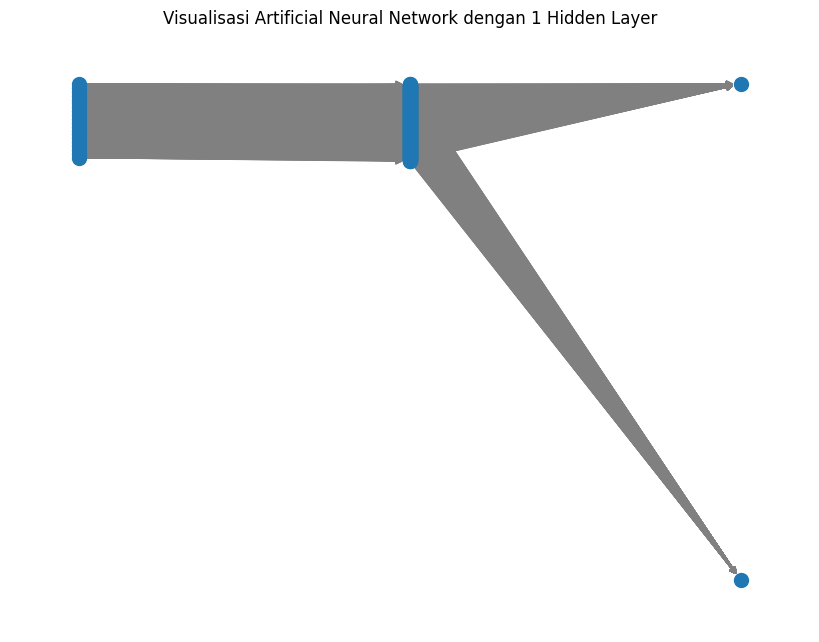

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Jumlah neuron di tiap layer
input_neurons = 20
hidden_neurons = 256
output_neurons = 2

# Buat graph
G = nx.DiGraph()

# Posisi node
pos = {}

# Tambahkan input layer
for i in range(input_neurons):
    G.add_node(f"I{i}", layer=0)
    pos[f"I{i}"] = (0, -i)

# Tambahkan hidden layer
for i in range(hidden_neurons):
    G.add_node(f"H{i}", layer=1)
    pos[f"H{i}"] = (1, -i * (input_neurons / hidden_neurons))

# Tambahkan output layer
for i in range(output_neurons):
    G.add_node(f"O{i}", layer=2)
    pos[f"O{i}"] = (2, -i * (hidden_neurons / output_neurons))

# Buat edge dari input ke hidden layer
for i in range(input_neurons):
    for j in range(hidden_neurons):
        G.add_edge(f"I{i}", f"H{j}")

# Buat edge dari hidden ke output layer
for i in range(hidden_neurons):
    for j in range(output_neurons):
        G.add_edge(f"H{i}", f"O{j}")

# Plot jaringan saraf
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=100, edge_color="gray")
plt.title("Visualisasi Artificial Neural Network dengan 1 Hidden Layer")
plt.show()


Berdasarkan hasil percobaan dengan berbagai model, yaitu **CART, ANN dengan 4 kelas, dan ANN dengan 2 kelas**, diperoleh bahwa model **CART memiliki akurasi tertinggi, sekitar 92%**. Sementara itu, model **ANN dengan 2 kelas juga menunjukkan akurasi yang cukup tinggi, sekitar 90%**, yang mengindikasikan bahwa kedua model masih layak digunakan dalam pemodelan data ini.  

Perbedaan akurasi ini kemungkinan disebabkan oleh preprocessing yang lebih kompleks pada pemodelan **ANN**, seperti **mengonversi marla dan kanal ke satuan meter persegi** serta **menerapkan teknik ADASYN untuk menangani ketidakseimbangan data**. Oleh karena itu, aspek ini perlu diperhatikan dalam penggunaannya karena dapat memengaruhi akurasi model.  

Sementara itu, pemodelan menggunakan **ANN dengan 4 kelas menghasilkan akurasi yang lebih rendah serta nilai loss yang cukup besar**. Hal ini menunjukkan bahwa pendekatan dengan **empat kelas kurang optimal** untuk diterapkan dalam konteks data ini.